In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')
require('tidycensus')
require('sf')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse
Loading required package: tidycensus
Loading required package: sf
Linking to GEOS 3.12.1, GDAL 3.8.3, PROJ 9.3.1; sf_use_s2() is TRUE


In [4]:
%%R
# read merged_data.csv as a dataframe
merged_df <- read.csv("merged_rent.csv")

In [5]:
%%R
# show the column name
colnames(merged_df)

 [1] "X"                 "GEOID"             "NAME"             
 [4] "BOROUGH"           "eviction_19"       "eviction_23"      
 [7] "population_renter" "median_rent"       "white"            
[10] "black"             "asian"             "hispanic"         
[13] "median_inc"        "eviction_rate_19"  "eviction_rate_23" 
[16] "geometry"          "race"              "change_rate"      
[19] "change_number"     "change"           


In [6]:
%%R
# linear regression model
model <- lm(I((eviction_23-eviction_19)/eviction_19) ~ median_inc + black + hispanic, data=merged_df)
print(summary(model))


Call:
lm(formula = I((eviction_23 - eviction_19)/eviction_19) ~ median_inc + 
    black + hispanic, data = merged_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2480 -0.6950 -0.3439  0.3436  6.9050 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  3.002e-01  1.430e-01   2.099   0.0360 *
median_inc   6.324e-07  1.127e-06   0.561   0.5749  
black       -2.756e-01  1.225e-01  -2.251   0.0246 *
hispanic     8.642e-02  1.633e-01   0.529   0.5968  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.087 on 1174 degrees of freedom
Multiple R-squared:  0.007268,	Adjusted R-squared:  0.004731 
F-statistic: 2.865 on 3 and 1174 DF,  p-value: 0.03563



In [7]:
%%R
# linear regression model
model <- lm(eviction_23 ~ median_rent + black + hispanic, data=merged_df)
print(summary(model))


Call:
lm(formula = eviction_23 ~ median_rent + black + hispanic, data = merged_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.9862 -2.7206 -0.7615  1.6820 28.8244 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.1603434  0.7114441   1.631    0.103    
median_rent -0.0001759  0.0003038  -0.579    0.563    
black        4.1061830  0.4964759   8.271  3.6e-16 ***
hispanic     8.8181683  0.6093060  14.472  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.28 on 1165 degrees of freedom
  (9 observations deleted due to missingness)
Multiple R-squared:  0.2136,	Adjusted R-squared:  0.2116 
F-statistic: 105.5 on 3 and 1165 DF,  p-value: < 2.2e-16



In [8]:
%%R
# linear regression model
model <- lm(eviction_rate_23 ~ median_rent + black + hispanic, data=merged_df)
print(summary(model))


Call:
lm(formula = eviction_rate_23 ~ median_rent + black + hispanic, 
    data = merged_df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.002733 -0.001033 -0.000516  0.000331  0.098497 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.595e-04  5.978e-04   1.103    0.270    
median_rent 3.751e-07  2.552e-07   1.470    0.142    
black       2.031e-03  4.171e-04   4.869 1.28e-06 ***
hispanic    3.347e-04  5.119e-04   0.654    0.513    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.003596 on 1165 degrees of freedom
  (9 observations deleted due to missingness)
Multiple R-squared:  0.02164,	Adjusted R-squared:  0.01912 
F-statistic: 8.589 on 3 and 1165 DF,  p-value: 1.215e-05



In [9]:
%%R
# linear regression model
model <- lm(change_number ~ median_rent + black + hispanic, data=merged_df)
print(summary(model))


Call:
lm(formula = change_number ~ median_rent + black + hispanic, 
    data = merged_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.8390  -1.7236  -0.0048   1.8362  18.0105 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -1.1668945  0.6389299  -1.826  0.06806 . 
median_rent  0.0005126  0.0002728   1.879  0.06050 . 
black       -1.1275717  0.4458724  -2.529  0.01157 * 
hispanic     1.6763121  0.5472022   3.063  0.00224 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.844 on 1165 degrees of freedom
  (9 observations deleted due to missingness)
Multiple R-squared:  0.02487,	Adjusted R-squared:  0.02236 
F-statistic: 9.905 on 3 and 1165 DF,  p-value: 1.886e-06



In [10]:
%%R
# linear regression model
model <- lm(change_rate ~ median_rent + black + hispanic, data=merged_df)
print(summary(model))


Call:
lm(formula = change_rate ~ median_rent + black + hispanic, data = merged_df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.049560 -0.000579  0.000182  0.000851  0.019595 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -1.773e-04  4.303e-04  -0.412  0.68039   
median_rent -1.168e-07  1.837e-07  -0.636  0.52518   
black       -6.296e-04  3.003e-04  -2.097  0.03623 * 
hispanic     9.511e-04  3.685e-04   2.581  0.00997 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.002589 on 1165 degrees of freedom
  (9 observations deleted due to missingness)
Multiple R-squared:  0.01635,	Adjusted R-squared:  0.01382 
F-statistic: 6.455 on 3 and 1165 DF,  p-value: 0.0002468



`geom_smooth()` using formula = 'y ~ x'


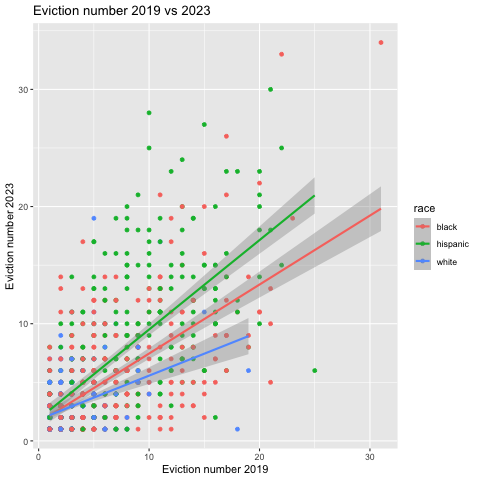

In [11]:
%%R -o merged_df
# plot eviction_19 by eviction_23
merged_df %>%
    ggplot(aes(x=eviction_19, y=eviction_23, color=race)) +
    geom_point()+
    geom_smooth(method="lm") +
    labs(title="Eviction number 2019 vs 2023", x="Eviction number 2019", y="Eviction number 2023")

`geom_smooth()` using formula = 'y ~ x'


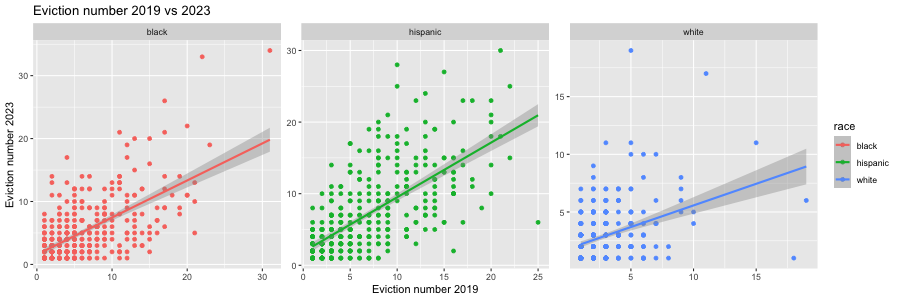

In [24]:
%%R -w 900 -h 300
# plot eviction_19 by eviction_23
merged_df %>%
    ggplot(aes(x=eviction_19, y=eviction_23, color=race)) +
    geom_point()+
    geom_smooth(method="lm") +
    facet_wrap(~race, scales='free') +
    labs(title="Eviction number 2019 vs 2023", x="Eviction number 2019", y="Eviction number 2023")

In [13]:
%%R
# lm model
model1 <- lm(eviction_23 ~ eviction_19, data=merged_df %>% filter(race == "black"))
model2 <- lm(eviction_23 ~ eviction_19, data=merged_df %>% filter(race == "hispanic"))
model3 <- lm(eviction_23 ~ eviction_19, data=merged_df %>% filter(race == "white"))
# print coefficient
print('black')
print(coef(model1))
print('hispanic')
print(coef(model2))
print('white')
print(coef(model3))

[1] "black"
(Intercept) eviction_19 
  1.5670817   0.5887976 
[1] "hispanic"
(Intercept) eviction_19 
  1.8713952   0.7632982 
[1] "white"
(Intercept) eviction_19 
  1.8232090   0.3746302 


<Figure size 1000x600 with 0 Axes>

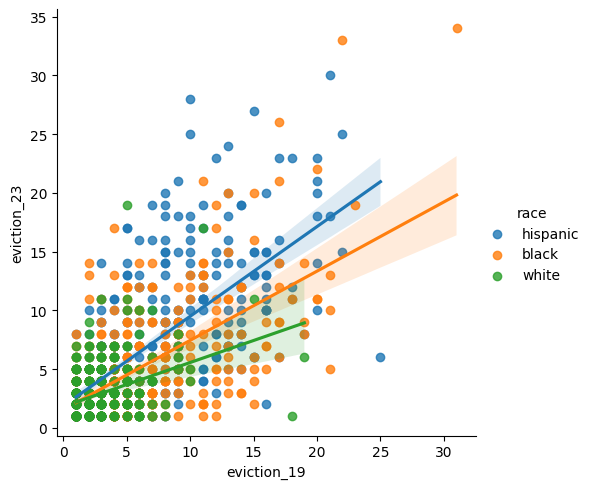

In [14]:
import seaborn as sns
plt.figure(figsize=(10, 6))
# plot 'eviction_19' by 'eviction_23', color by race
sns.lmplot(x='eviction_19', y='eviction_23', data=merged_df, hue='race')

`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 6 rows containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`). 



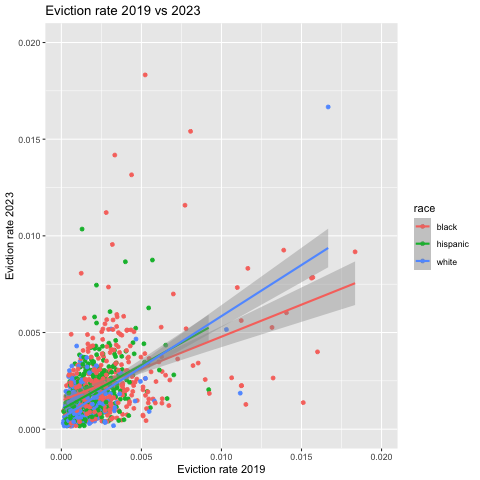

In [15]:
%%R
# plot eviction_19 by eviction_23
merged_df %>%
    ggplot(aes(x=eviction_rate_19, y=eviction_rate_23,color=race)) +
    geom_point()+
    geom_smooth(method="lm") +
    xlim(0, 0.02) +
    ylim(0, 0.02) +
    labs(title="Eviction rate 2019 vs 2023", x="Eviction rate 2019", y="Eviction rate 2023")

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 9 rows containing missing values or values outside the scale range
(`geom_point()`). 



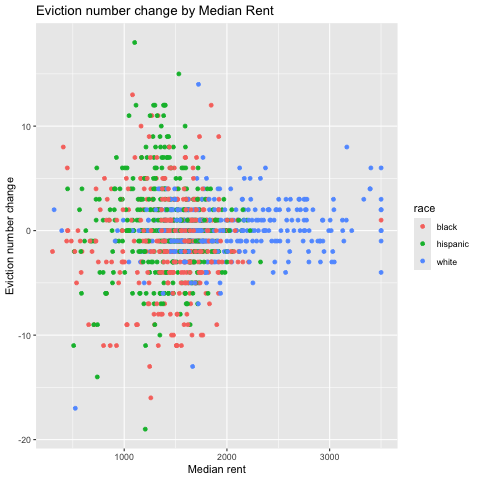

In [16]:
%%R
# plot eviction_rate_change by median_rent
merged_df %>%
    ggplot(aes(x=median_rent, y=change_number, color=race)) +
    geom_point() +
    labs(title="Eviction number change by Median Rent", x="Median rent", y="Eviction number change")

In [17]:
%%R
# read newyork_map.csv
map_df <- read.csv("newyork_map.csv")

In [18]:
%%R
# show the column name
colnames(map_df)

 [1] "id"                   "month_date"           "month_filings"       
 [4] "month_rate"           "month_rate_scale_max" "month_diff"          
 [7] "pct_white"            "pct_black"            "pct_latinx"          
[10] "race"                 "execute_count"        "execute_rate"        
[13] "median_income"        "median_rent"         


In [19]:
%%R
# lm model, month_rate by pct_black and pct_latinx
model <- lm(month_rate ~ pct_black + pct_latinx, data=map_df)
print(summary(model))


Call:
lm(formula = month_rate ~ pct_black + pct_latinx, data = map_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.06499 -0.01089  0.00051  0.01018  0.09770 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0006473  0.0029975   0.216    0.829    
pct_black   0.0698477  0.0061099  11.432   <2e-16 ***
pct_latinx  0.0785910  0.0079558   9.878   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02095 on 187 degrees of freedom
  (110 observations deleted due to missingness)
Multiple R-squared:  0.5508,	Adjusted R-squared:  0.546 
F-statistic: 114.6 on 2 and 187 DF,  p-value: < 2.2e-16



R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 103 rows containing missing values or values outside the scale range
(`geom_point()`). 



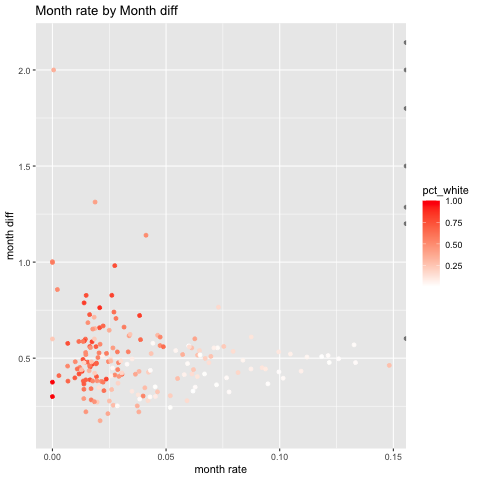

In [20]:
%%R
# plot month_rate by pct_black and pct_latinx
map_df %>%
    ggplot(aes(x=month_rate, y=month_diff, color=pct_white)) +
    geom_point() +
    scale_color_gradient(low="white", high="red") +
    labs(title="Month rate by Month diff", x="month rate", y="month diff")

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'



Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine

In addition: Warning messages:
1: Removed 110 rows containing non-finite outside the scale range
(`stat_smooth()`). 
2: Removed 110 rows containing missing values or values outside the scale range
(`geom_point()`). 
3: Removed 110 rows containing non-finite outside the scale range
(`stat_smooth()`). 
4: Removed 110 rows containing missing values or values outside the scale range
(`geom_point()`). 


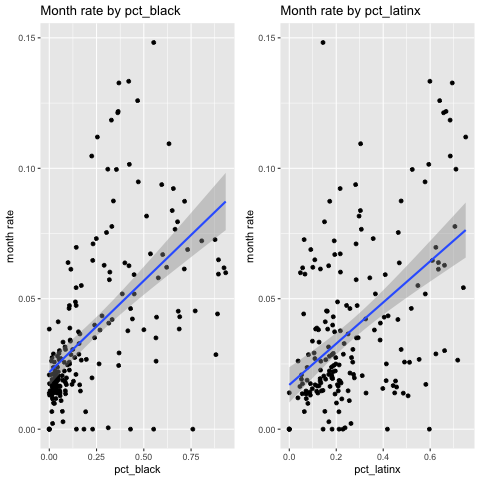

In [21]:
%%R
library(gridExtra)

# create the first plot
p1 <- map_df %>%
    ggplot(aes(x=pct_black, y=month_rate)) +
    geom_point() +
    geom_smooth(method="lm") +
    labs(title="Month rate by pct_black", x="pct_black", y="month rate")

# create the second plot
p2 <- map_df %>%
    ggplot(aes(x=pct_latinx, y=month_rate)) +
    geom_point() +
    geom_smooth(method="lm") +
    labs(title="Month rate by pct_latinx", x="pct_latinx", y="month rate")

# arrange the plots in one cell
grid.arrange(p1, p2, ncol=2)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


In addition: Warning messages:
1: Removed 110 rows containing non-finite outside the scale range
(`stat_smooth()`). 
2: Removed 110 rows containing missing values or values outside the scale range
(`geom_point()`). 
3: Removed 110 rows containing non-finite outside the scale range
(`stat_smooth()`). 
4: Removed 110 rows containing missing values or values outside the scale range
(`geom_point()`). 


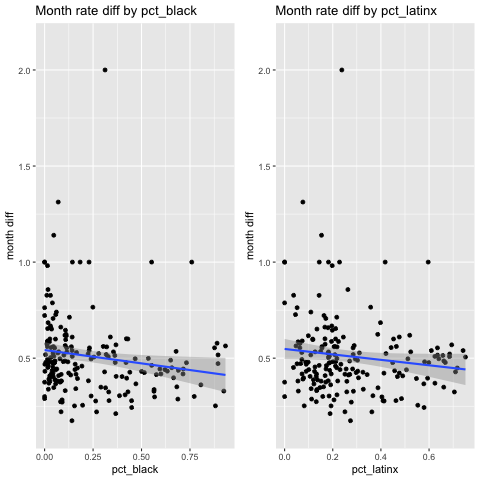

In [22]:
%%R

# create the first plot
p1 <- map_df %>%
    ggplot(aes(x=pct_black, y=month_diff)) +
    geom_point() +
    geom_smooth(method="lm") +
    labs(title="Month rate diff by pct_black", x="pct_black", y="month diff")

# create the second plot
p2 <- map_df %>%
    ggplot(aes(x=pct_latinx, y=month_diff)) +
    geom_point() +
    geom_smooth(method="lm") +
    labs(title="Month rate diff by pct_latinx", x="pct_latinx", y="month diff")

# arrange the plots in one cell
grid.arrange(p1, p2, ncol=2)